<a href="https://colab.research.google.com/github/jtviegas-sandbox/datascience/blob/main/notebooks/findata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fredapi

In [2]:
from google.colab import userdata
FRED_KEY=userdata.get('FRED_API_KEY')

In [3]:
from fredapi import Fred
fred = Fred(api_key=FRED_KEY)

In [4]:
cpi = fred.get_series("CPALTT01USM657N")

In [5]:
cpi

1955-02-01         NaN
1955-03-01         NaN
1955-04-01         NaN
1955-05-01         NaN
1955-06-01         NaN
                ...   
2023-06-01    0.322891
2023-07-01    0.190752
2023-08-01    0.436716
2023-09-01    0.248513
2023-10-01   -0.038338
Length: 825, dtype: float64

In [ ]:
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt

In [ ]:
#Number of iterations in the simulation
n = 100000
#Draw random points from a uniform distribution in the X-Y plane to fill the area of a square that has a side of 2 units
x = npr.uniform(low=-1, high=1, size=n)
y = npr.uniform(low=-1, high=1, size=n)

In [ ]:
inside = np.sqrt(x**2 + y**2) <=1

In [ ]:
pi = 4.0*sum(inside)/n

In [ ]:
error = abs((pi-np.pi)/np.pi)*100
print("After {0} simulations, our estimate of Pi is {1} with an error of {2}%".format(n, pi, round(error,2)))


After 100000 simulations, our estimate of Pi is 3.13584 with an error of 0.18%


(-1.0999829889419241,
 1.0999748155445537,
 -1.0999535871356843,
 1.1000042173507936)

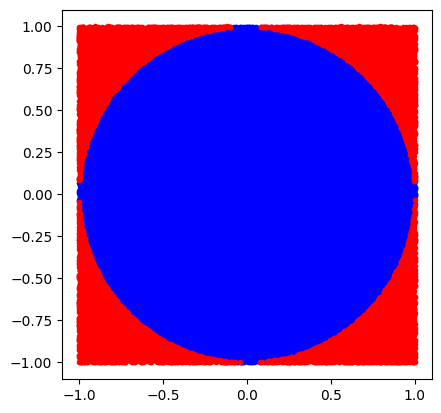

In [ ]:
outside = np.invert(inside)
#Plot the graph
plt.plot(x[inside], y[inside], 'b.')
plt.plot(x[outside], y[outside], 'r.')
plt.axis('square')



<ipython-input-10-4f9251bf555c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


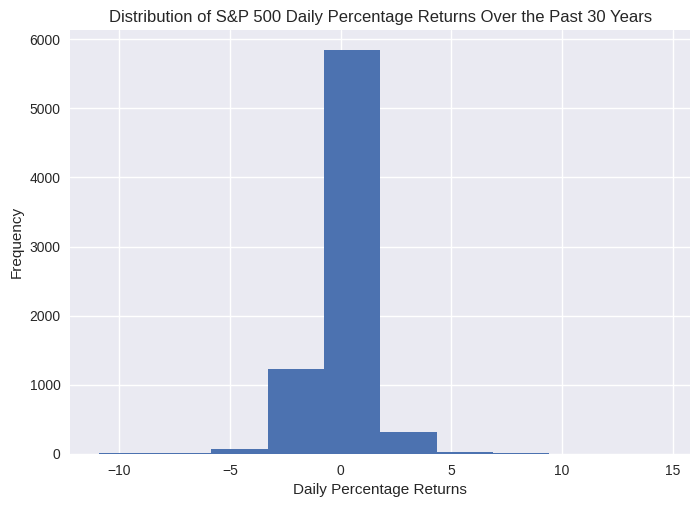

Descriptive statistics of S&P 500 percentage returns:
count    7481.00
mean        0.04
std         1.19
min       -10.94
25%        -0.44
50%         0.07
75%         0.59
max        14.52
Name: Returns, dtype: float64
The skewness of S&P 500 returns is: -0.07 and the kurtosis is: 11.43.


In [ ]:
#Import Python libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#Install web scraper for Yahoo Finance
!pip install yfinance
import yfinance as yf
#Import over 30 years of S&P 500 ('SPY') price data into a dataframe called equity
start = datetime(1993, 2, 1)
end = datetime(2022, 10, 15)
equity = yf.Ticker('SPY').history(start=start, end=end)
#Use SPY's closing prices to compute its daily returns. Remove NaNs from your dataframe.
equity['Returns'] = equity['Close'].pct_change(1)*100
equity = equity.dropna()
#Visualize and summarize SPY's daily price returns. Compute its skewness and kurtosis.
plt.hist(equity['Returns']), plt.title('Distribution of S&P 500 Daily Percentage Returns Over the Past 30 Years'), plt.xlabel('Daily Percentage Returns'), plt.ylabel('Frequency'), plt.show();
print("Descriptive statistics of S&P 500 percentage returns:\n{}".format(equity['Returns'].describe().round(2)))
print('The skewness of S&P 500 returns is: {0:.2f} and the kurtosis is: {1:.2f}.'.format(equity['Returns'].skew(), equity['Returns'].kurtosis()))

